<h2 style="text-align: center">Sample Linear Regression</h2>

In [2]:
# import library
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [88]:
torch.manual_seed(82)


weight = .7
bias = .3

# bound
start = 0
end = 5
n_samples = 100


X = torch.linspace(start, end, n_samples).unsqueeze(dim=1)
y = weight * x + bias + torch.randn(n_samples).unsqueeze(dim=1) * .3

idx = torch.randperm(n_samples)
X, y = X[idx], y[idx]

In [90]:
train_size = .7

X_train, y_train = X[:int(train_size * n_samples)], y[:int(train_size * n_samples)]
X_val, y_val = X[int(train_size * n_samples):], y[int(train_size * n_samples):]

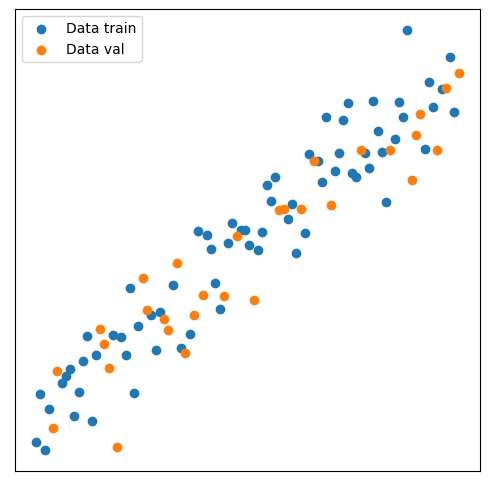

In [104]:
def plot_data(X_train=X_train,
              y_train=y_train,
              X_val=X_val,
              y_val=y_val,
              prediction=None):
    plt.figure(figsize=(6,6))
    plt.scatter(X_train, y_train, label="Data train")
    plt.scatter(X_val, y_val, label="Data val")
    
    if prediction is not None:
        plt.scatter(X_val, prediction, label="Prediction")
        
    plt.xticks([])
    plt.yticks([])
    plt.legend()
    plt.show()
    
plot_data()

In [93]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, 
                                              dtype=torch.float32,
                                              requires_grad=True))
        
        self.bias = nn.Parameter(torch.randn(1, 
                                            dtype=torch.float32,
                                            requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [173]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegression()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [174]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [175]:
with torch.inference_mode():
    y_preds = model_0(X_val)
    
torch.sum((y_preds - y_val)**2, dim=0)

tensor([39.1886])

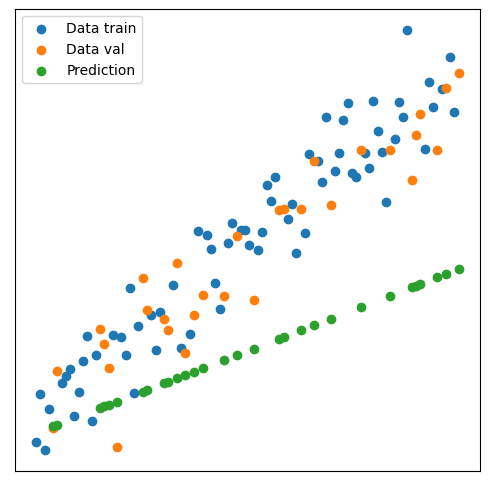

In [176]:
plot_data(prediction=y_preds)

In [177]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(),
                        lr = .01)

In [178]:
model_0.parameters()

<generator object Module.parameters at 0x000001B3A0B1E890>

In [210]:
training_losses = []
test_losses = []

def training_loop(model, X, y, X_val, y_val, loss_fn, optimizer, epochs = 100):
    
    for epoch in range(epochs):
        # Training mode
        model.train()
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        # Test mode
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_val)
            test_loss = loss_fn(test_pred, y_val)
            
            training_losses.append(loss.item())
            test_losses.append(test_loss.item())
        
        if epoch % 10 == 0:
            print(f"Evaluation | Training loss: {loss:.2f} | Test loss: {test_loss:.2f}")
        
# training_loop(model_0, X_train, y_train, X_val, y_val, loss_fn, optimizer)

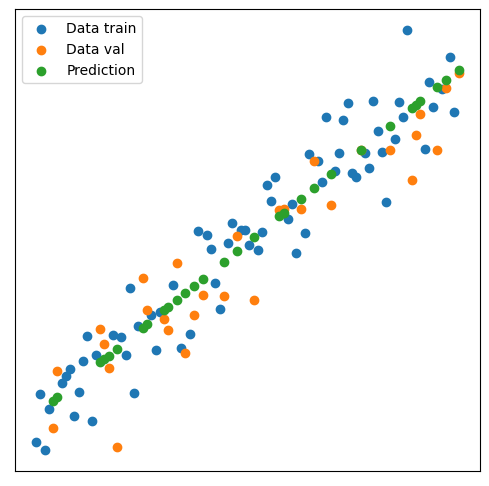

In [180]:
with torch.inference_mode():
    y_pred = model_0(X_val)

plot_data(prediction=y_pred.detach().numpy())

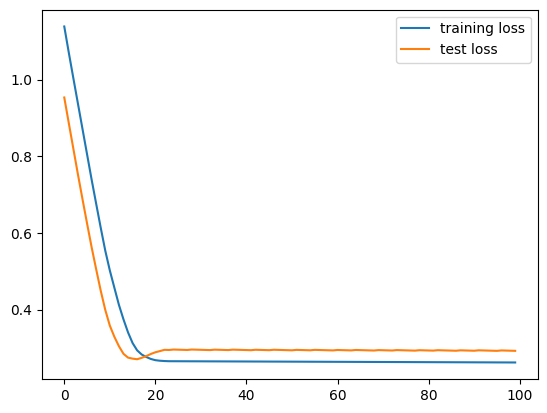

In [181]:
epochs = 100

plt.plot(range(epochs), training_losses[:epochs], label="training loss")
plt.plot(range(epochs), test_losses[:epochs], label="test loss")
plt.legend()
plt.show()

In [187]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model in {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), 
          f=MODEL_SAVE_PATH)

Saving model in models\01_pytorch_workflow_model_0.pth


In [184]:
MODEL_PATH.name

'models'

In [192]:
!dir 

 Volume in drive C is Acer
 Volume Serial Number is C2E4-43D6

 Directory of C:\Users\ADMIN\DataScience\Pytorch

07/24/2023  03:37 PM    <DIR>          .
07/23/2023  03:23 PM    <DIR>          ..
07/24/2023  10:24 AM    <DIR>          .ipynb_checkpoints
07/18/2023  03:56 PM           131,266 Autograd.ipynb
07/18/2023  02:31 PM               488 data_linear.csv
07/24/2023  01:44 PM    <DIR>          Exercise
07/13/2023  04:30 PM             8,788 Model Torch.ipynb
07/24/2023  03:38 PM    <DIR>          models
07/24/2023  03:37 PM           111,638 Sample Linear Regression.ipynb
07/24/2023  01:43 PM            18,163 Tensor.ipynb
               5 File(s)        270,343 bytes
               5 Dir(s)  95,031,349,248 bytes free


In [193]:
from pathlib import Path

MODEL_PATH = Path("models")

In [194]:
MODEL_PATH.mkdir(parents=True, exist_ok=True)

In [196]:
load_model = LinearRegression()

load_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [199]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, X):

        return self.linear_layer(X)

In [211]:
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7388]])),
             ('linear_layer.bias', tensor([0.1354]))])

In [214]:
loss_fn_1 = nn.L1Loss()

optimizer_1 = torch.optim.SGD(model_1.parameters(),
                        lr = .01)

training_loop(model_1, X_train, y_train, X_val, y_val, loss_fn_1, optimizer_1)

Evaluation | Training loss: 0.27 | Test loss: 0.30
Evaluation | Training loss: 0.27 | Test loss: 0.30
Evaluation | Training loss: 0.27 | Test loss: 0.30
Evaluation | Training loss: 0.27 | Test loss: 0.29
Evaluation | Training loss: 0.27 | Test loss: 0.30
Evaluation | Training loss: 0.26 | Test loss: 0.29
Evaluation | Training loss: 0.26 | Test loss: 0.29
Evaluation | Training loss: 0.26 | Test loss: 0.29
Evaluation | Training loss: 0.26 | Test loss: 0.29
Evaluation | Training loss: 0.26 | Test loss: 0.29


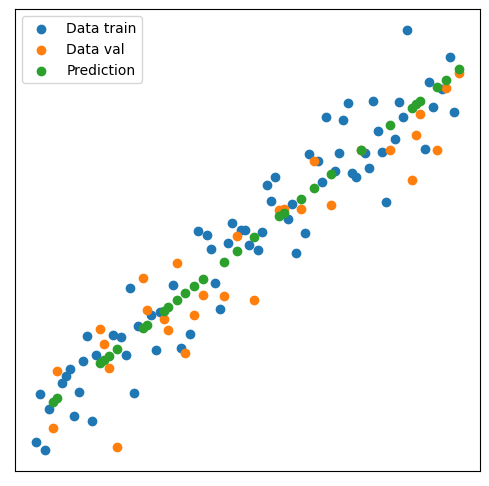

In [215]:
with torch.inference_mode():
    y_preds = model_1(X_val)
    
plot_data(prediction=y_preds)